In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import  mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import parallel_coordinates
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
print(df.shape)
df.head()

(506, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.dtypes

0     float64
1     float64
2     float64
3       int64
4     float64
5     float64
6     float64
7     float64
8       int64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object

In [5]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [6]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)

13    0
12    0
11    0
10    0
9     0
8     0
7     0
6     0
5     0
4     0
3     0
2     0
1     0
0     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE505CA0B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EE50BA5550>]], dtype=object)

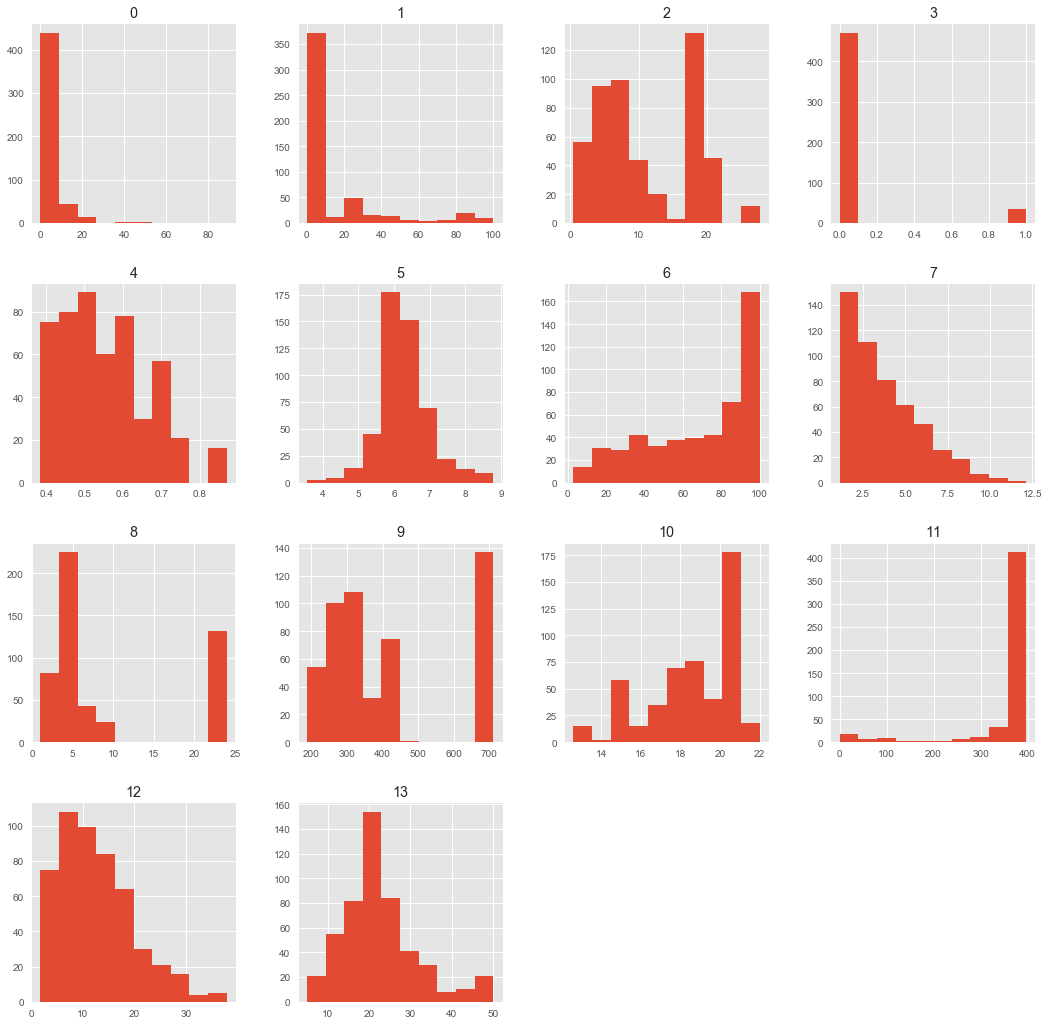

In [7]:
plt.rcParams['figure.figsize'] = (18.0, 18.0)
graph = df[list(df.columns)[:]]
graph.hist()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size=0.25)

model: linear regression
R-squared:  0.617000309008
MS Error:  29.5151377902
cv scores:  [ 0.63546384  0.66121898  0.70162811  0.79568811]
mean score:  0.698499762508


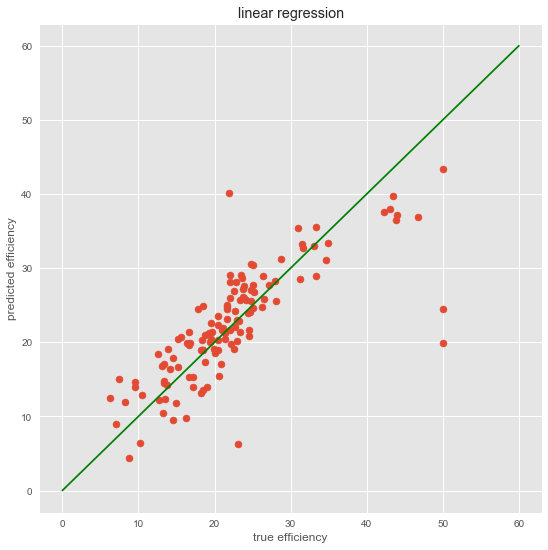

In [48]:
# Choose linear regression as our regressor from scikit-learn
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('model: linear regression')
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' linear regression ')
plt.show()

model: random forest
R-squared:  0.789424623185
MS Error:  16.227588189
cv scores:  [ 0.7665901   0.7697956   0.86197308  0.85480003]
mean score:  0.813289699997


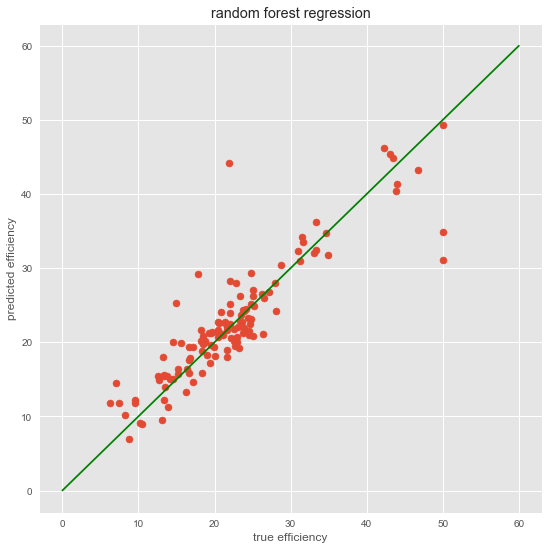

In [49]:
# random forest
regressor = RandomForestRegressor(random_state=2)

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('model: random forest')
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' random forest regression ')
plt.show()

model: MLP regression
R-squared:  0.549732019689
MS Error:  34.6990396963
cv scores:  [ 0.48178757  0.57101123  0.57163354  0.5539207 ]
mean score:  0.544588261101


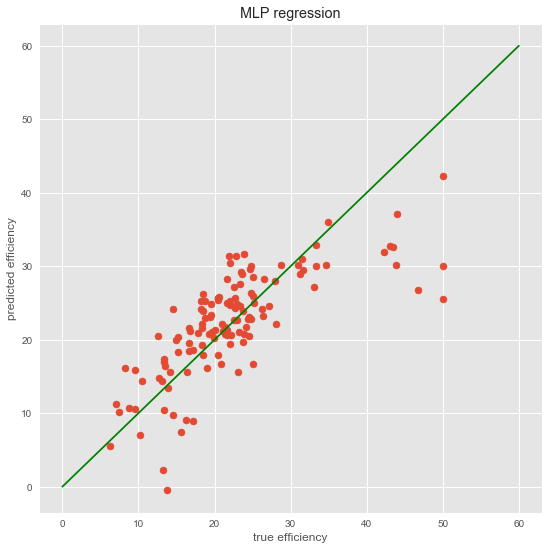

In [50]:

regressor = MLPRegressor(random_state=12, hidden_layer_sizes= (12) , activation='relu', solver='adam', max_iter=100000)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('model: MLP regression')
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' MLP regression ')
plt.show()

# scaled data

In [63]:
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model: linear regression
R-squared:  0.61836382052
MS Error:  29.4100613865
cv scores:  [ 0.63546384  0.66121898  0.70162811  0.79568811]
mean score:  0.698499762508


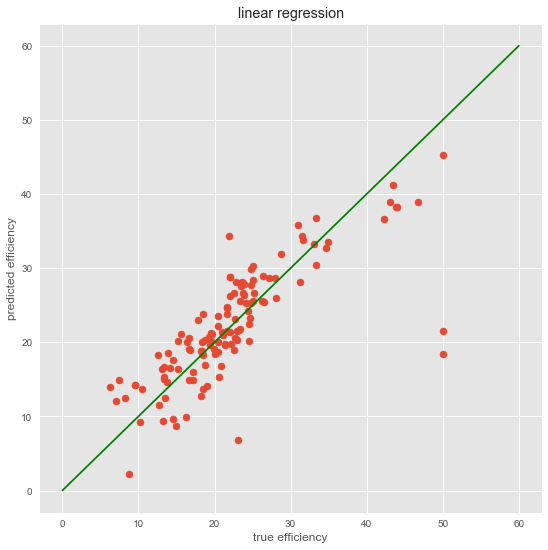

In [64]:
regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)

regressor.fit(X_train_scaled, y_train)
y_predictions = regressor.predict(X_test_scaled)

# Check how our model is doing
print('model: linear regression')
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' linear regression ')
plt.show()

model: random forest
R-squared:  0.802933925365
MS Error:  15.186519685
cv scores:  [ 0.7665901   0.7697956   0.86197308  0.85480003]
mean score:  0.813289699997


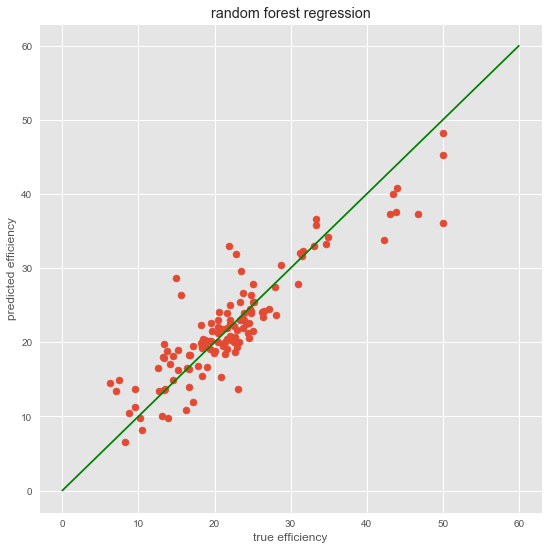

In [65]:
regressor = RandomForestRegressor(random_state=2)

regressor.fit(X_train_scaled, y_train)
y_predictions = regressor.predict(X_test_scaled)

# Check how our model is doing
print('model: random forest')
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' random forest regression ')
plt.show()

model: MLP regression
R-squared:  0.561742897721
MS Error:  33.7734443801
cv scores:  [ 0.48178757  0.57101123  0.57163354  0.5539207 ]
mean score:  0.544588261101


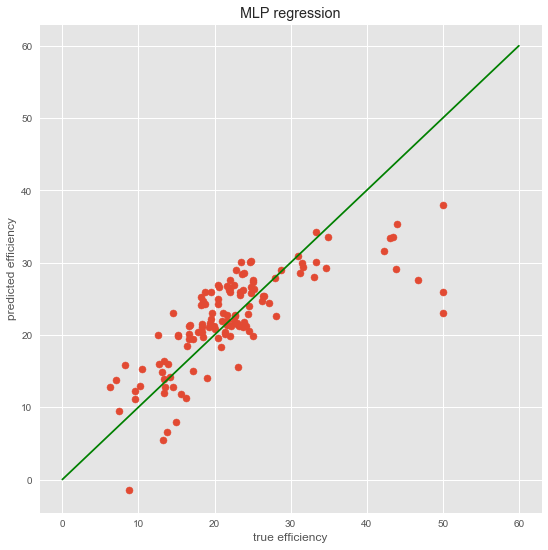

In [66]:
regressor = MLPRegressor(random_state=12, hidden_layer_sizes= (12) , activation='relu', solver='adam', max_iter=100000)

regressor.fit(X_train_scaled, y_train.values.ravel())
y_predictions = regressor.predict(X_test_scaled)

# Check how our model is doing
print('model: MLP regression')
print('R-squared: ', regressor.score(X_test_scaled, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' MLP regression ')
plt.show()

# Using TPOT

In [ ]:
# from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_boston_pipeline.py')

Generation 1 - Current best internal CV score: 11.807468623058957


Generation 2 - Current best internal CV score: 10.488376572763805


Generation 3 - Current best internal CV score: 10.488376572763805


Generation 4 - Current best internal CV score: 9.977054106989273


Generation 5 - Current best internal CV score: 9.977054106989273


Generation 6 - Current best internal CV score: 9.71005445236744


Generation 7 - Current best internal CV score: 9.71005445236744


Generation 8 - Current best internal CV score: 9.71005445236744


Optimization Progress:  88%|████████████████████████████████████████████▊      | 483/550 [07:48<00:49,  1.34pipeline/s]

model: extra trees regression
R-squared:  0.840702121814
MS Error:  12.2759859471
cv scores:  [ 0.76687227  0.86263212  0.90337191  0.88907   ]
mean score:  0.855486571667


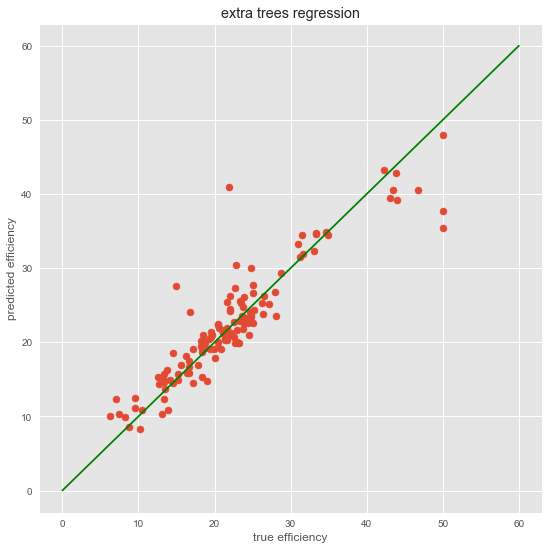

In [10]:
from sklearn.ensemble import ExtraTreesRegressor

regressor =  ExtraTreesRegressor(bootstrap=False, max_features=0.8, min_samples_leaf=1, min_samples_split=4, n_estimators=100)

regressor.fit(X_train, y_train.values.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('model: extra trees regression')
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

cv = ShuffleSplit(n_splits=4, test_size=0.25, random_state=0)
scores = cross_val_score(regressor, X, y.values.ravel(), cv=cv)
print('cv scores: ', scores)
print('mean score: ', scores.mean())

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' extra trees regression ')
plt.show()